<a href="https://colab.research.google.com/github/VasylDvorakDS/Probability_and_statistics_theory/blob/master/Probability_theory_Home_Work_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA (exploratory data analysis) или Разведочный анализ

# Задача 1:
Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Формула смещённой дисперсии


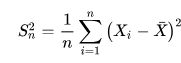


Формула несмещённой дисперсии:


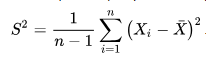


In [ ]:
import numpy as np
import math

In [ ]:
x= np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

n=len(x)
Xmean=np.sum(x)/n
print('Среднее арифметическое: ',Xmean,'=',np.mean(x))

sum_sq=0
for k in x:
  sum_sq+=(k-Xmean)**2

S_2 = sum_sq/n
print('Смещённая дисперсия: ',S_2,'=',np.var(x))

S=np.sqrt(S_2)
print('Cредне квадратичное отклонение: ',S,'=',np.std(x))

S_2_sm = sum_sq/(n-1)
print('Несмещённая дисперсия: ',S_2_sm,'=',np.var(x,ddof=1))



Среднее арифметическое:  65.3 = 65.3
Смещённая дисперсия:  950.11 = 950.11
Cредне квадратичное отклонение:  30.823854398825596 = 30.823854398825596
Несмещённая дисперсия:  1000.1157894736842 = 1000.1157894736842


**Задача 2.**
    
  В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике -
  12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?





Возможные комбинации когда три мяча белые и сумма комбинаций:

(ЧЧ)(БББЧ)+(БЧ)(ББЧЧ)+(ББ)(ЧЧЧБ)

Вероятность того что произойдёт комбинация (ЧЧ)(БББЧ)

In [ ]:
Pbbwwwb=(math.comb(3,2)/(math.comb(8,2)))*(math.comb(5,3)*math.comb(7,1)/(math.comb(12,4)))
Pbbwwwb

0.01515151515151515

Вероятность того что произойдёт комбинация (БЧ)(ББЧЧ)

In [ ]:
Pwbwwbb=(math.comb(5,1)*math.comb(3,1)/(math.comb(8,2)))*(math.comb(5,2)*math.comb(7,2)/(math.comb(12,4)))
Pwbwwbb

0.22727272727272727

Вероятность того что произойдёт комбинация (ББ)(ЧЧЧБ)

In [ ]:
Pwwbbbw=(math.comb(5,2)/(math.comb(8,2)))*(math.comb(7,3)*math.comb(5,1)/(math.comb(12,4)))
Pwwbbbw

0.12626262626262627

In [ ]:
P_answer = Pbbwwwb+Pwbwwbb+Pwwbbbw

print("Вероятность того, что три мяча белые", round(P_answer, 3))

Вероятность того, что три мяча белые 0.369


 **Задача 3:**

  На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. Найти вероятность того, что выстрел произведен: a). первым спортсменом б). вторым спортсменом в). третьим спортсменом.

  Вероятность того что произойдёт попадание равна:

  $$P(A) = P(B1)*P(A|B1)+P(B2)*P(A|B2)+P(B3)*P(A|B3)$$
P(B1)=P(B2)=P(B3)=1/3 - вероятность того что первый или второй или третий стрелок выстрелит

Вероятность попадания для первого спортсмена равна P(A|B1)= 0.9, для второго — P(A|B2)= 0.8, для третьего — P(A|B3)= 0.6.


In [ ]:
PA = (1/3)*(0.9+0.8+0.6)
PA


0.7666666666666667

Далее воспользуемся формулой Бейса и напишем функцию для расчёта.

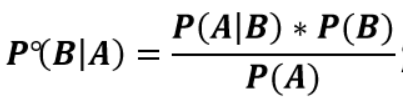


In [ ]:
def beies(PAB,PB,PA,n):
  print(f'Вероятность того что выстрел произвёл {n}-й спортсмен: ', round(PAB*PB/PA,3))

In [ ]:
beies(0.9,1/3,PA,1)
beies(0.8,1/3,PA,2)
beies(0.6,1/3,PA,3)

Вероятность того что выстрел произвёл 1-й спортсмен:  0.391
Вероятность того что выстрел произвёл 2-й спортсмен:  0.348
Вероятность того что выстрел произвёл 3-й спортсмен:  0.261


  **Задача 4**
  
  В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

  На факультете A или B  учится одна часть студентов
  На факультете С учится две части студентов

  Вероятность того что студент учится на факультете A или B : 1/4
  Вероятность того что студент учится на факультете С : 2/4=1/2

  Как и в предыдущей задаче воспользуемся формулой для расчёта вероятности сдачи сессии:

  $$P(A) = P(B1)*P(A|B1)+P(B2)*P(A|B2)+P(B3)*P(A|B3)$$




In [ ]:
PA = (1/4)*0.8+(1/4)*0.7+(1/2)*0.9
PA

0.825

Далее воспользуемся формулой Бейеса и напишем для неё функцию

In [ ]:
def beies(PAB,PB,PA,n):
  print(f'Вероятность того что сдал сессию студент из {n}-й группы: ', round(PAB*PB/PA,3))

In [ ]:
beies(0.8,1/4,PA,1)
beies(0.7,1/4,PA,2)
beies(0.9,2/4,PA,3)

Вероятность того что сдал сессию студент из 1-й группы:  0.242
Вероятность того что сдал сессию студент из 2-й группы:  0.212
Вероятность того что сдал сессию студент из 3-й группы:  0.545


**Задача 5**

Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [ ]:
Pall=round(0.1*0.2*0.25, 3)
print('Вероятность того, что в первый месяц выйдут из строя все детали',Pall)

Вероятность того, что в первый месяц выйдут из строя все детали 0.005


In [ ]:
P2=round(0.1*0.2*(1-0.25)+0.1*(1-0.2)*0.25+(1-0.1)*0.2*0.25, 3)
print('Вероятность того, что в первый месяц выйдут из строя только две детали',P2)

Вероятность того, что в первый месяц выйдут из строя только две детали 0.08


In [ ]:
P12 = P2 + round(0.1*(1-0.2)*(1-0.25)+(1-0.1)*0.2*(1-0.25)+(1-0.1)*(1-0.2)*0.25,3)
print('Вероятность того, что в первый месяц выйдут из строя от одной до двух деталей',P12)

Вероятность того, что в первый месяц выйдут из строя от одной до двух деталей 0.455


In [ ]:
P123=P12+Pall
print('Вероятность того, что в первый месяц выйдут из строя хотябы одна деталь ',P123)

Вероятность того, что в первый месяц выйдут из строя хотябы одна деталь  0.46
